In [549]:
import csv
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
from bs4 import BeautifulSoup


driver_path = "/usr/local/bin/chromedriver"
service = Service(driver_path)
driver = webdriver.Chrome(service=service)


url = "https://2gis.kz/almaty/search/%D0%9F%D0%BE%D0%B5%D1%81%D1%82%D1%8C/filters/sort%3Drating/page/348/firm/70000001046594484/76.881432%2C43.248071/tab/reviews?m=76.881432%2C43.248071%2F17.64%2Fp%2F14%2Fr%2F-9.52"
driver.get(url)


wait = WebDriverWait(driver, 4000)
wait.until(EC.presence_of_all_elements_located((By.XPATH, "//div[contains(@class, '_1k5soqfl')]")))  

# Step 3: Scroll the page to load more reviews
last_height = driver.execute_script("return document.body.scrollHeight")  
scroll_pause_time = 100  
reviews_count = 0


while True:
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")  # Scroll to bottom
    time.sleep(scroll_pause_time)
    new_height = driver.execute_script("return document.body.scrollHeight")  

    # Check if page height hasn't changed, meaning no new content is loaded
    if new_height == last_height:
        break
    
    last_height = new_height  # Update last height to current height
    reviews_count += 1  # Increment review count (for debugging)
    print(f"Scrolled {reviews_count} times...")  # Show scroll progress

# Step 4: Extract the data from the fully loaded page
soup = BeautifulSoup(driver.page_source, "html.parser")
review_blocks = soup.find_all("div", class_="_1k5soqfl")

# Step 5: Prepare a list to store data
data = []

for block in review_blocks:
    user_name_tag = block.find("span", class_="_16s5yj36")  # Replace with correct class for user name
    user_name = user_name_tag["title"] if user_name_tag else "Unknown"

    review_text_tag = block.find("div", class_="_49x36f")  # Replace with the correct class for review text
    review_text = review_text_tag.get_text(strip=True) if review_text_tag else "No review text"

    star_tags = block.find_all("svg", {"fill": "#ffb81c"})
    star_count = len(star_tags)

    date_tag = block.find("div", class_="_139ll30")  # Assuming the date is in this class
    review_date = date_tag.get_text(strip=True) if date_tag else "No date provided"


    data.append((user_name, review_text, star_count, review_date))

# Step 6: Save data to CSV
csv_file = "paksushi.csv"  # Specify the filename
with open(csv_file, mode="w", encoding="utf-8", newline="") as file:
    writer = csv.writer(file)
    writer.writerow(["User Name", "Review Text", "Rating (Stars)", "Review Date"])  # CSV Header
    writer.writerows(data)

print(f"Data saved to {csv_file}")

# Step 7: Close the driver
driver.quit()


Data saved to paksushi.csv


In [729]:
import pandas as pd
df = pd.read_csv('paksushi.csv')
df

,User Name,Review Text,Rating (Stars),Review Date
0,Абильдаева Жанар,С сабой заказ бергем арзан болғандықтан\n5мың ...,4,сегодня
1,Зарина Бекмухамедова,"Заказали сет Муфаса, ужас просто! Филадельфия ...",2,сегодня
2,Afternoon,Заведение готовит не вкусно так ещё и берет бо...,1,2 января 2025
3,Олжас Жанболат,Мынандай қылып бергенше вообще ет салмаяқ қойс...,1,2 января 2025
4,Dake 19,Тамақтарынан шаш шықты не стойт алғаныма өкінп...,1,2 января 2025
...,...,...,...,...
5115,жайсан омарбек,ваще не сответствует все написано красиво но н...,1,7 декабря 2020
5116,Санду Идрисова,День добрый. Вчера заказали самовывоз. Все оче...,5,4 декабря 2020
5117,Aleksandra Timokhina,Ужасно! Заказали сет-Пикник! . Суши мы любим и...,1,"28 ноября 2020, отредактирован"
5118,Мистер Пиф-паф,Первый и последний раз заказал там .Ужасный се...,1,27 ноября 2020


In [749]:
from datetime import datetime

# Replace "Сегодня" with today's date in the 'Review Date' column
df['Review Date'] = df['Review Date'].replace('сегодня', datetime.now().strftime('%d %B %Y'))

In [751]:
df

,User Name,Review Text,Rating (Stars),Review Date
0,Абильдаева Жанар,С сабой заказ бергем арзан болғандықтан\n5мың ...,4,03 January 2025
1,Зарина Бекмухамедова,"Заказали сет Муфаса, ужас просто! Филадельфия ...",2,03 January 2025
2,Afternoon,Заведение готовит не вкусно так ещё и берет бо...,1,2 января 2025
3,Олжас Жанболат,Мынандай қылып бергенше вообще ет салмаяқ қойс...,1,2 января 2025
4,Dake 19,Тамақтарынан шаш шықты не стойт алғаныма өкінп...,1,2 января 2025
...,...,...,...,...
5115,жайсан омарбек,ваще не сответствует все написано красиво но н...,1,7 декабря 2020
5116,Санду Идрисова,День добрый. Вчера заказали самовывоз. Все оче...,5,4 декабря 2020
5117,Aleksandra Timokhina,Ужасно! Заказали сет-Пикник! . Суши мы любим и...,1,"28 ноября 2020, отредактирован"
5118,Мистер Пиф-паф,Первый и последний раз заказал там .Ужасный се...,1,27 ноября 2020


In [753]:
df.isnull().sum()

User Name         0
Review Text       0
Rating (Stars)    0
Review Date       0
dtype: int64

In [755]:
df.shape

(5120, 4)

In [757]:
df['Review Date'].value_counts()

Review Date
22 апреля 2023                    55
17 августа 2023                   52
6 июля 2022                       46
23 апреля 2023                    45
5 октября 2022                    44
                                  ..
28 мая 2023                        1
27 мая 2023, отредактирован        1
22 мая 2023, отредактирован        1
20 мая 2023, отредактирован        1
18 ноября 2020, отредактирован     1
Name: count, Length: 1551, dtype: int64

In [759]:
df.columns

Index(['User Name', 'Review Text', 'Rating (Stars)', 'Review Date'], dtype='object')

In [761]:
df['Rating (Stars)'].value_counts()

Rating (Stars)
1    2790
5    2079
2     102
4      92
3      57
Name: count, dtype: int64

In [763]:
def standardize_date(date_str):
    # Remove "отредактирован" or any extra words
    clean_date = date_str.split(',')[0].strip()
    
    # Map Russian month names to their English equivalents
    months_russian_to_english = {
        'января': 'January', 'февраля': 'February', 'марта': 'March',
        'апреля': 'April', 'мая': 'May', 'июня': 'June',
        'июля': 'July', 'августа': 'August', 'сентября': 'September',
        'октября': 'October', 'ноября': 'November', 'декабря': 'December'
    }
    
    for rus, eng in months_russian_to_english.items():
        clean_date = clean_date.replace(rus, eng)
    
    # Convert to datetime format
    try:
        standardized_date = pd.to_datetime(clean_date, format='%d %B %Y', errors='coerce')
    except Exception as e:
        print(f"Error parsing date: {clean_date}. Error: {e}")
        return None
    
    return standardized_date

# Apply the function to the 'Review Date' column
df['Date'] = df['Review Date'].apply(standardize_date)

In [765]:
df.drop(columns = ['Review Date'], axis = 1, inplace = True)

In [767]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5120 entries, 0 to 5119
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   User Name       5120 non-null   object        
 1   Review Text     5120 non-null   object        
 2   Rating (Stars)  5120 non-null   int64         
 3   Date            5120 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 160.1+ KB


In [769]:
df.describe()

,Rating (Stars),Date
count,5120.000000,5120
mean,2.720312,2023-06-15 13:45:45
min,1.000000,2020-11-18 00:00:00
25%,1.000000,2022-09-13 00:00:00
50%,1.000000,2023-08-08 00:00:00
75%,5.000000,2024-04-14 00:00:00
max,5.000000,2025-01-03 00:00:00
std,1.940182,NaN


In [771]:
df['Year'] = df['Date'].dt.strftime('%Y')

In [773]:
df.head()

,User Name,Review Text,Rating (Stars),Date,Year
0,Абильдаева Жанар,С сабой заказ бергем арзан болғандықтан\n5мың ...,4,2025-01-03,2025
1,Зарина Бекмухамедова,"Заказали сет Муфаса, ужас просто! Филадельфия ...",2,2025-01-03,2025
2,Afternoon,Заведение готовит не вкусно так ещё и берет бо...,1,2025-01-02,2025
3,Олжас Жанболат,Мынандай қылып бергенше вообще ет салмаяқ қойс...,1,2025-01-02,2025
4,Dake 19,Тамақтарынан шаш шықты не стойт алғаныма өкінп...,1,2025-01-02,2025


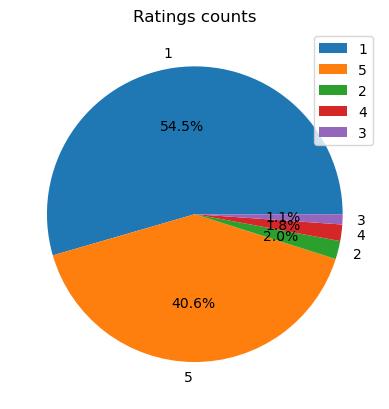

In [779]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y = df['Rating (Stars)'].value_counts()
plt.pie(y, labels = ['1', '5', '2', '4', '3'], autopct = '%1.1f%%')
plt.legend()
plt.title('Ratings counts')
plt.show()

In [781]:
rating_over_time = df.groupby('Year')['Rating (Stars)'].mean()

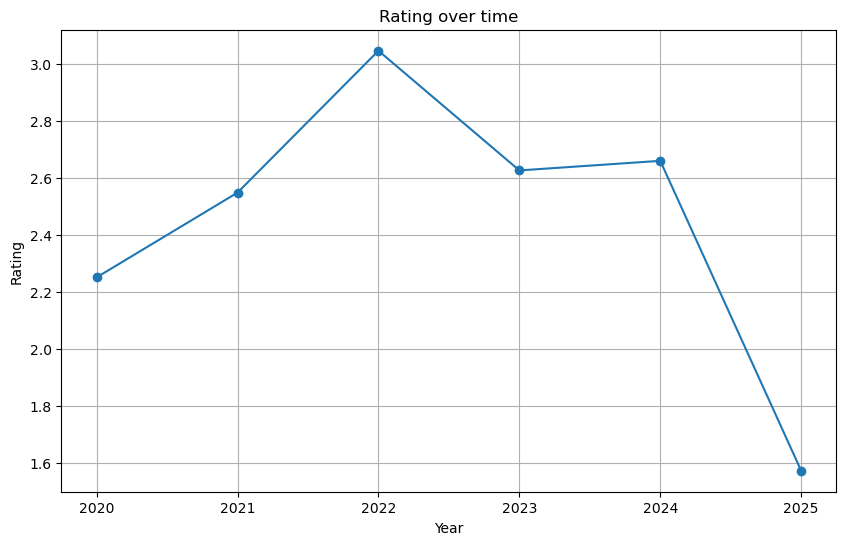

In [783]:
plt.figure(figsize=(10, 6))
rating_over_time.plot(kind = 'line', marker = 'o')
plt.title('Rating over time')
plt.xlabel('Year')
plt.ylabel('Rating')
plt.grid()
plt.show()

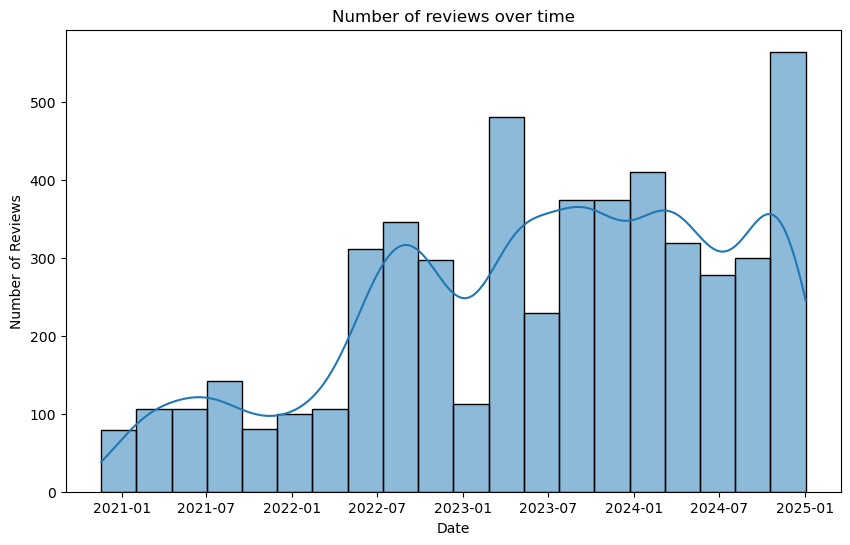

In [785]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Date'], bins=20, kde=True)
plt.title('Number of reviews over time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.show()


In [787]:
data = df
data

,User Name,Review Text,Rating (Stars),Date,Year
0,Абильдаева Жанар,С сабой заказ бергем арзан болғандықтан\n5мың ...,4,2025-01-03,2025
1,Зарина Бекмухамедова,"Заказали сет Муфаса, ужас просто! Филадельфия ...",2,2025-01-03,2025
2,Afternoon,Заведение готовит не вкусно так ещё и берет бо...,1,2025-01-02,2025
3,Олжас Жанболат,Мынандай қылып бергенше вообще ет салмаяқ қойс...,1,2025-01-02,2025
4,Dake 19,Тамақтарынан шаш шықты не стойт алғаныма өкінп...,1,2025-01-02,2025
...,...,...,...,...,...
5115,жайсан омарбек,ваще не сответствует все написано красиво но н...,1,2020-12-07,2020
5116,Санду Идрисова,День добрый. Вчера заказали самовывоз. Все оче...,5,2020-12-04,2020
5117,Aleksandra Timokhina,Ужасно! Заказали сет-Пикник! . Суши мы любим и...,1,2020-11-28,2020
5118,Мистер Пиф-паф,Первый и последний раз заказал там .Ужасный се...,1,2020-11-27,2020


In [789]:
df.drop(columns = ['User Name', 'Date', 'Year'], axis = 1, inplace = True)
df

,Review Text,Rating (Stars)
0,С сабой заказ бергем арзан болғандықтан\n5мың ...,4
1,"Заказали сет Муфаса, ужас просто! Филадельфия ...",2
2,Заведение готовит не вкусно так ещё и берет бо...,1
3,Мынандай қылып бергенше вообще ет салмаяқ қойс...,1
4,Тамақтарынан шаш шықты не стойт алғаныма өкінп...,1
...,...,...
5115,ваще не сответствует все написано красиво но н...,1
5116,День добрый. Вчера заказали самовывоз. Все оче...,5
5117,Ужасно! Заказали сет-Пикник! . Суши мы любим и...,1
5118,Первый и последний раз заказал там .Ужасный се...,1


In [791]:
df['Rating'] = np.where(df['Rating (Stars)'] >= 4, 1, 0)
df.drop(columns = ['Rating (Stars)'], axis = 1, inplace = True)
df

,Review Text,Rating
0,С сабой заказ бергем арзан болғандықтан\n5мың ...,1
1,"Заказали сет Муфаса, ужас просто! Филадельфия ...",0
2,Заведение готовит не вкусно так ещё и берет бо...,0
3,Мынандай қылып бергенше вообще ет салмаяқ қойс...,0
4,Тамақтарынан шаш шықты не стойт алғаныма өкінп...,0
...,...,...
5115,ваще не сответствует все написано красиво но н...,0
5116,День добрый. Вчера заказали самовывоз. Все оче...,1
5117,Ужасно! Заказали сет-Пикник! . Суши мы любим и...,0
5118,Первый и последний раз заказал там .Ужасный се...,0


In [793]:
df['Rating'].value_counts()

Rating
0    2949
1    2171
Name: count, dtype: int64

array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

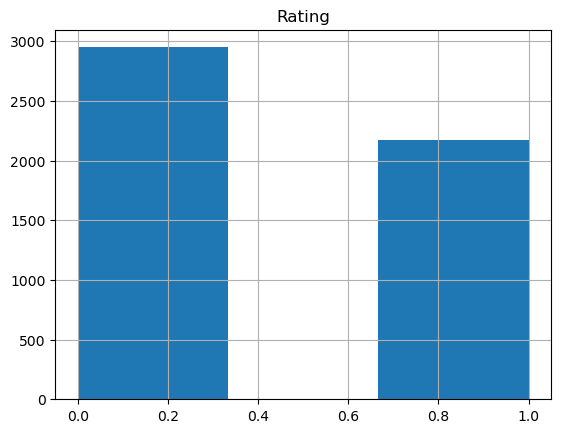

In [805]:
df.hist(bins = 3)

In [807]:
df['length'] = df['Review Text'].apply(len)

In [809]:
df.describe()

,Rating,length
count,5120.000000,5120.00000
mean,0.424023,135.44668
std,0.494242,176.33929
min,0.000000,10.00000
25%,0.000000,27.00000
50%,0.000000,69.50000
75%,1.000000,180.00000
max,1.000000,1993.00000


In [813]:
df[df['length'] == 1993]['Review Text'].iloc[0]

'Одна звезда для paksushi это много. Обманывают людей на ровном месте. Зашёл в инсту, попался их реклама, смотрю страницу, а там так все красиво, суши такие мясистые да и цена приемлемая. Думаю закажу, не всегда же самурай суши есть. Позвонил, заказ приняли, спросили адрес и номер квартиры. Все началось с курьера. Приехал он примерно через час, звонит и говорит мне что бы я вышел и забрал заказ, я в вежливой форме, какого хрена? Зачем при приеме заказа тогда вообще спрашивают номер квартиры. Отказался выходит, он с одолжением решил подняться. У меня только нал, даю ему 20000 сдачи нет. Ставит мне условие или на каспи или без сдачи или я забираю заказ. Я говорю каспи нет, есть карта халык или забирай заказ. Хотел взять меня на понт, но не на того нарвался, в итоге сходил в машину, принес сдачи. Ну да хрен с ним. А теперь самое интересное)))))) самые невкусные суши в городе. Развязываю пакетики, смотрю, понять не могу, заказ что ли перепутали. Смотрю на картинку в инсте и на свой стол, а

In [817]:
sentences = df['Review Text'].tolist()
len(sentences)

5120

In [819]:
words = ' '.join(sentences)
len(words)

698606

In [821]:
positive = df[df['Rating'] == 1]
positive.describe()

,Rating,length
count,2171.0,2171.000000
mean,1.0,43.460617
std,0.0,53.683976
min,1.0,10.000000
25%,1.0,17.000000
50%,1.0,27.000000
75%,1.0,49.000000
max,1.0,926.000000


In [823]:
negative = df[df['Rating'] == 0]
negative.describe()

,Rating,length
count,2949.0,2949.000000
mean,0.0,203.165141
std,0.0,202.621013
min,0.0,10.000000
25%,0.0,73.000000
50%,0.0,150.000000
75%,0.0,262.000000
max,0.0,1993.000000


In [850]:
set(stopwords.words('russian') + stopwords.words('kazakh'))

{'а',
 'ай',
 'айтпақшы',
 'ал',
 'алайда',
 'алатау',
 'алақай',
 'алдақашан',
 'ана',
 'анау',
 'арбаң-арбаң',
 'арнайы',
 'арс',
 'арс-ұрс',
 'арсалаң-арсалаң',
 'арқылы',
 'астапыралла',
 'ау',
 'ах',
 'аһа',
 'бар',
 'барлық',
 'барша',
 'барқ',
 'батыр-бұтыр',
 'без',
 'бері',
 'бетер',
 'беу',
 'бойы',
 'бойымен',
 'более',
 'болп',
 'больше',
 'борт',
 'будет',
 'будто',
 'бы',
 'был',
 'была',
 'были',
 'было',
 'былп',
 'быть',
 'біз',
 'бізбен',
 'бізге',
 'бізден',
 'біздер',
 'біздерге',
 'біздерден',
 'біздердің',
 'біздермен',
 'біздің',
 'бірақ',
 'бірге',
 'бірдеме',
 'біреу',
 'бірнеше',
 'бүгжең-бүгжең',
 'бүйт',
 'бүкіл',
 'бұл',
 'бұндай',
 'бұрын',
 'бәрекелді',
 'бәрі',
 'в',
 'вам',
 'вас',
 'вдруг',
 'ведь',
 'во',
 'вот',
 'впрочем',
 'все',
 'всегда',
 'всего',
 'всех',
 'всю',
 'вы',
 'где',
 'гүрс',
 'гөрі',
 'да',
 'даже',
 'далаң-далаң',
 'два',
 'дегенмен',
 'дейін',
 'для',
 'до',
 'другой',
 'дүрс',
 'дүңк',
 'дәнеңе',
 'е',
 'его',
 'ее',
 'ей',
 'еме

In [890]:
import string 
string.punctuation
import nltk # Natural Language tool kit
from nltk.corpus import stopwords
stop_words = set(stopwords.words('russian') + stopwords.words('kazakh')) - {'не'} - {'емес'} - {'это'}

In [892]:
def message_cleaning(message):
    test_rem_punc = [char for char in message if char not in string.punctuation]
    test_rem_punc_join = ''.join(test_rem_punc)
    test_rem_punc_join_clean = [word for word in test_rem_punc_join.split() if word.lower() not in stop_words]
    return test_rem_punc_join_clean

In [894]:
NLP_dataset_clean = df['Review Text'].apply(message_cleaning)
NLP_dataset_clean
NLP_dataset_clean_joined = NLP_dataset_clean.apply(lambda x: ' '.join(x))
NLP_dataset_clean_joined

0       сабой заказ бергем арзан болғандықтан 5мың тг ...
1       Заказали сет Муфаса ужас просто Филадельфия од...
2       Заведение готовит не вкусно ещё берет большой ...
3       Мынандай қылып бергенше вообще ет салмаяқ қойс...
4       Тамақтарынан шаш шықты не стойт алғаныма өкінп...
                              ...                        
5115    ваще не сответствует написано красиво деле обр...
5116    День добрый Вчера заказали самовывоз очень вку...
5117    Ужасно Заказали сетПикник Суши любим часто зак...
5118    Первый последний заказал Ужасный сервис осталь...
5119    Заказали сэт Указана акция опоздал курьер сэт ...
Name: Review Text, Length: 5120, dtype: object

In [896]:
sentences = NLP_dataset_clean_joined.tolist()

In [898]:
words = " ".join(sentences)

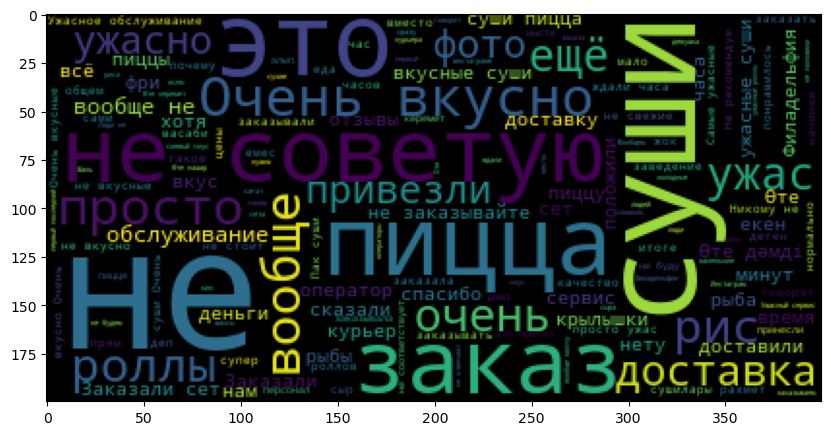

In [900]:
from wordcloud import WordCloud
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(words))

In [902]:
from sklearn.feature_extraction.text import CountVectorizer
# Define the cleaning pipeline we defined earlier
vectorizer = CountVectorizer(analyzer = message_cleaning)
NLP_dataset_countvectorizer = vectorizer.fit_transform(df['Review Text'])

In [904]:
NLP_dataset_countvectorizer.shape

(5120, 20057)

In [906]:
texts = pd.DataFrame(NLP_dataset_countvectorizer.toarray())
texts.describe()

,0,1,2,3,4,5,6,7,8,9,...,20047,20048,20049,20050,20051,20052,20053,20054,20055,20056
count,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,...,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000,5120.000000
mean,0.021094,0.000977,0.000586,0.000781,0.000195,0.000391,0.000195,0.000195,0.000195,0.000195,...,0.000586,0.000195,0.000195,0.000195,0.000195,0.000195,0.000586,0.000195,0.000195,0.000195
std,0.164025,0.036966,0.024201,0.034227,0.013975,0.019762,0.013975,0.013975,0.013975,0.013975,...,0.024201,0.013975,0.013975,0.013975,0.013975,0.013975,0.024201,0.013975,0.013975,0.013975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,4.000000,2.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [908]:
X = NLP_dataset_countvectorizer
y = df['Rating']

In [910]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [912]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

<Axes: >

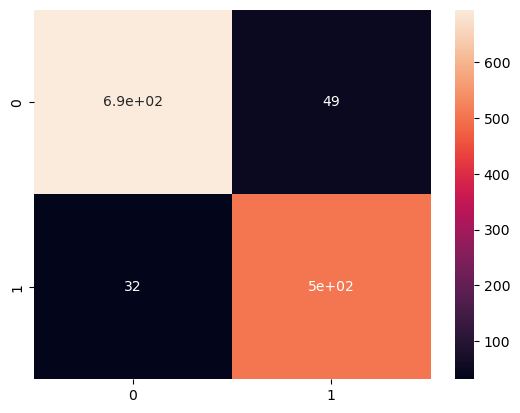

In [914]:
from sklearn.metrics import classification_report, confusion_matrix
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [916]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94       743
           1       0.91      0.94      0.93       537

    accuracy                           0.94      1280
   macro avg       0.93      0.94      0.94      1280
weighted avg       0.94      0.94      0.94      1280



In [948]:
def predict_review_sentiment(review, model, vectorizer):
    """
    Predicts if a given review is positive (1) or negative (0).
    
    Parameters:
    - review (str): The review text provided by the user.
    - model: Trained classification model (e.g., Naive Bayes).
    - vectorizer: Trained CountVectorizer or TfidfVectorizer to transform text into features.

    Returns:
    - str: Prediction result ("Positive Review" or "Negative Review").
    """
    # Preprocess the review using the vectorizer
    review_vectorized = vectorizer.transform([review])
    
    # Predict the sentiment using the trained model
    prediction = model.predict(review_vectorized)
    
    # Map the binary result to a meaningful label
    result = "Positive Review" if prediction[0] == 1 else "Negative Review"
    
    return result

# Example usage
user_review = input("Write your review: ")
prediction_result = predict_review_sentiment(user_review, NB_classifier, vectorizer)
print(f"The sentiment of your review is: {prediction_result}")


Write your review:  люблю


The sentiment of your review is: Positive Review
